In [334]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [335]:
data = pd.read_csv('New_Data_WineQT.csv')

In [336]:
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.4             0.700         0.00             1.9      0.076   
1              7.8             0.880         0.00             2.6      0.098   
2              7.8             0.760         0.04             2.3      0.092   
3             11.2             0.280         0.56             1.9      0.075   
4              7.4             0.660         0.00             1.8      0.075   
..             ...               ...          ...             ...        ...   
783            6.3             0.510         0.13             2.3      0.076   
784            6.8             0.620         0.08             1.9      0.068   
785            6.2             0.600         0.08             2.0      0.090   
786            5.9             0.550         0.10             2.2      0.062   
787            5.9             0.645         0.12             2.0      0.075   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11.0                  34.0  0.99780  3.51       0.56   
1                   25.0                  67.0  0.99680  3.20       0.68   
2                   15.0                  54.0  0.99700  3.26       0.65   
3                   17.0                  60.0  0.99800  3.16       0.58   
4                   13.0                  40.0  0.99780  3.51       0.56   
..                   ...                   ...      ...   ...        ...   
783                 29.0                  40.0  0.99574  3.42       0.75   
784                 28.0                  38.0  0.99651  3.42       0.82   
785                 32.0                  44.0  0.99490  3.45       0.58   
786                 39.0                  51.0  0.99512  3.52       0.76   
787                 32.0                  44.0  0.99547  3.57       0.71   

     alcohol  quality  
0        9.4        5  
1        9.8        5  
2        9.8        5  
3        9.8        6  
4        9.4        5  
..       ...      ...  
783     11.0        6  
784      9.5        6  
785     10.5        5  
786     11.2        6  
787     10.2        5  

[788 rows x 12 columns]

In [337]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count     788.000000        788.000000   788.000000      788.000000   
mean        8.206218          0.532855     0.249467        2.206345   
std         1.583427          0.171389     0.186076        0.440123   
min         5.100000          0.120000     0.000000        1.200000   
25%         7.100000          0.400000     0.080000        1.900000   
50%         7.850000          0.530000     0.240000        2.100000   
75%         9.000000          0.640000     0.400000        2.500000   
max        13.800000          1.090000     0.750000        3.450000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  788.000000           788.000000            788.000000  788.000000   
mean     0.079016            14.766497             43.120558    0.996598   
std      0.015701             8.444831             27.609952    0.001683   
min      0.038000             3.000000              6.000000    0.991620   
25%      0.069000             8.000000             22.000000    0.995515   
50%      0.078000            13.000000             36.000000    0.996560   
75%      0.087250            20.000000             58.000000    0.997600   
max      0.136000            39.000000            139.000000    1.001400   

               pH   sulphates     alcohol     quality  
count  788.000000  788.000000  788.000000  788.000000  
mean     3.322094    0.632069   10.394607    5.625635  
std      0.136127    0.112059    0.983975    0.761663  
min      3.020000    0.420000    9.000000    3.000000  
25%      3.220000    0.550000    9.587500    5.000000  
50%      3.320000    0.610000   10.100000    6.000000  
75%      3.410000    0.700000   11.100000    6.000000  
max      3.690000    0.970000   13.400000    8.000000

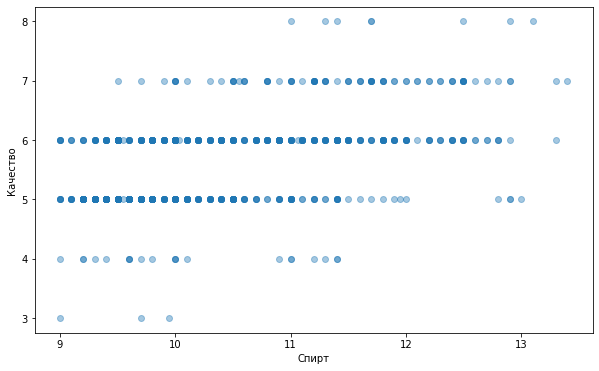

In [338]:
plt.figure(figsize=(10,6))
plt.scatter(data.alcohol, data.quality, alpha = 0.4)
plt.xlabel('Спирт')
plt.ylabel('Качество')
plt.show()

# Линейная регрессия

In [339]:
model = LinearRegression()

In [340]:
x = pd.DataFrame(data.alcohol).values
y = pd.DataFrame(data.quality).values

In [341]:
#разделение выборки на тестовую и тренировочную части
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [342]:
model.fit(x_train, y_train)

LinearRegression()

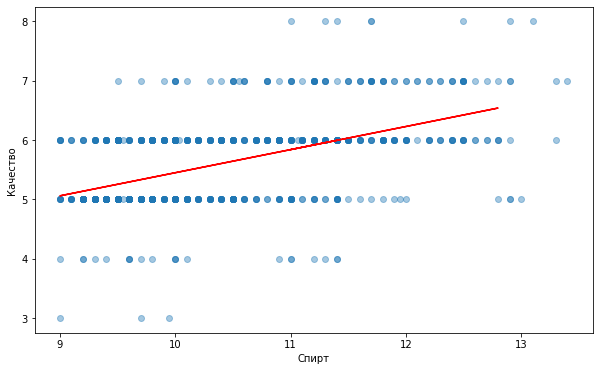

In [343]:
plt.figure(figsize=(10,6))
plt.scatter(data.alcohol, data.quality, alpha = 0.4)

plt.plot(x_test, model.predict(x_test), color = 'red')

plt.xlabel('Спирт')
plt.ylabel('Качество')
plt.show()

In [344]:
model.score(x, y)

0.24978370315157494

In [345]:
model.predict([[10]])

array([[5.44930073]])

In [346]:
# Полиноминальная регрессия

In [347]:
# # polynomial regression model
# from sklearn.preprocessing import PolynomialFeatures
# poly_reg = PolynomialFeatures(degree=3)
# x_test = pd.DataFrame(data.drop('quality',  axis = 1)).values
# y_test = pd.DataFrame(data.quality).values
# X_poly = poly_reg.fit_transform(x_train)
# X_poly_test = poly_reg.fit_transform(x_test)
 
# X_poly     # prints X_poly

# lin_reg2 = LinearRegression()
# lin_reg2.fit(X_poly,y_train)
 
# # X_grid = np.arange(min(x_test),max(x_test),0.1)
# # X_grid = X_grid.reshape(len(X_grid),1) 
# # plt.figure(figsize=(10,6))

# # plt.scatter(x_test, y_test, alpha = 0.4)
# # plt.scatter(x_test,y_test, color='red') 
# pred = lin_reg2.predict(X_poly_test)
# # plt.plot(X_grid, lin_reg2.predict(X_poly),color='red') 
 
# # plt.xlabel('Все атрибуты')
# # plt.ylabel('Качество')
# # plt.show()


# Множественная линейная регрессия

In [348]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

In [349]:
pd.isnull(data).any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [350]:
# data.drop(labels = [1],axis = 0, inplace = True)

y = data['quality']
X = data.drop('quality',  axis = 1)

In [351]:
y

0      5
1      5
2      5
3      6
4      5
      ..
783    6
784    6
785    5
786    6
787    5
Name: quality, Length: 788, dtype: int64

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=9)

In [353]:
lin_reg_mod = LinearRegression()

In [354]:
lin_reg_mod.fit(X_train, y_train)

LinearRegression()

In [108]:
pred = lin_reg_mod.predict(X_test)

In [109]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

In [110]:
print(test_set_rmse)
print(test_set_r2)

0.5780212867405481
0.39795373295248726


In [111]:
pred

array([6.5395361 , 4.85853334, 6.01650897, 5.22487129, 6.00246739,
       6.43286876, 6.13568847, 6.73083635, 5.17259501, 5.35010628,
       5.1893655 , 5.61320604, 6.24198609, 5.53200748, 5.33905487,
       5.54371047, 4.93395298, 5.46779535, 5.57103302, 5.48747528,
       5.05680284, 5.55994121, 5.34195166, 5.4005699 , 5.7368606 ,
       5.75028799, 5.25467558, 5.13925029, 5.33508252, 5.29751209,
       5.31817054, 5.56395076, 5.27694271, 5.28772982, 4.98220599,
       5.44580905, 5.82610986, 6.1253113 , 5.48061741, 6.30525513,
       5.3502172 , 5.78383363, 5.98791368, 6.12205011, 6.00292443,
       5.07304068, 5.34893979, 5.58697184, 6.07879241, 5.15189614,
       5.25269877, 5.38226846, 6.51110457, 5.12668643, 5.01041378,
       5.89011097, 5.25456873, 5.38152121, 4.89321793, 5.15429287,
       6.28753865, 5.69753654, 5.30679631, 5.34856534, 5.57331291,
       5.45263358, 6.16435982, 6.66373688, 5.28317743, 4.92536062,
       6.67887595, 5.53536028, 5.31892407, 6.27436458, 6.14344

In [112]:
X_test

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
679            7.6             0.300         0.42             2.0      0.052   
39             7.7             0.690         0.22             1.9      0.084   
512           11.6             0.230         0.57             1.8      0.074   
722            7.0             0.655         0.16             2.1      0.074   
734            7.1             0.270         0.60             2.1      0.074   
..             ...               ...          ...             ...        ...   
235            8.7             0.820         0.02             1.2      0.070   
24             8.8             0.610         0.30             2.8      0.088   
595           12.6             0.390         0.49             2.5      0.080   
533            7.4             0.490         0.27             2.1      0.071   
342            7.6             0.460         0.11             2.6      0.079   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
679                  6.0                  24.0  0.99630  3.44       0.82   
39                  18.0                  94.0  0.99610  3.31       0.48   
512                  3.0                   8.0  0.99810  3.14       0.70   
722                  8.0                  25.0  0.99606  3.37       0.55   
734                 17.0                  25.0  0.99814  3.38       0.72   
..                   ...                   ...      ...   ...        ...   
235                 36.0                  48.0  0.99520  3.20       0.58   
24                  17.0                  46.0  0.99760  3.26       0.51   
595                  8.0                  20.0  0.99920  3.07       0.82   
533                 14.0                  25.0  0.99388  3.35       0.63   
342                 12.0                  49.0  0.99680  3.21       0.57   

     alcohol  
679     11.9  
39       9.5  
512      9.9  
722      9.7  
734     10.6  
..       ...  
235      9.8  
24       9.3  
595     10.3  
533     12.0  
342     10.0  

[394 rows x 11 columns]

In [113]:
X_test['Quality predict'] = pred.tolist()
X_test['Quality right'] = y_test.tolist()
X_test

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
679            7.6             0.300         0.42             2.0      0.052   
39             7.7             0.690         0.22             1.9      0.084   
512           11.6             0.230         0.57             1.8      0.074   
722            7.0             0.655         0.16             2.1      0.074   
734            7.1             0.270         0.60             2.1      0.074   
..             ...               ...          ...             ...        ...   
235            8.7             0.820         0.02             1.2      0.070   
24             8.8             0.610         0.30             2.8      0.088   
595           12.6             0.390         0.49             2.5      0.080   
533            7.4             0.490         0.27             2.1      0.071   
342            7.6             0.460         0.11             2.6      0.079   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
679                  6.0                  24.0  0.99630  3.44       0.82   
39                  18.0                  94.0  0.99610  3.31       0.48   
512                  3.0                   8.0  0.99810  3.14       0.70   
722                  8.0                  25.0  0.99606  3.37       0.55   
734                 17.0                  25.0  0.99814  3.38       0.72   
..                   ...                   ...      ...   ...        ...   
235                 36.0                  48.0  0.99520  3.20       0.58   
24                  17.0                  46.0  0.99760  3.26       0.51   
595                  8.0                  20.0  0.99920  3.07       0.82   
533                 14.0                  25.0  0.99388  3.35       0.63   
342                 12.0                  49.0  0.99680  3.21       0.57   

     alcohol  Quality predict  Quality right  
679     11.9         6.539536              6  
39       9.5         4.858533              5  
512      9.9         6.016509              6  
722      9.7         5.224871              5  
734     10.6         6.002467              6  
..       ...              ...            ...  
235      9.8         5.374014              5  
24       9.3         5.065885              4  
595     10.3         6.217417              6  
533     12.0         6.192915              6  
342     10.0         5.479729              5  

[394 rows x 13 columns]

# Множественная полиномиальная регрессия (таблица)

In [114]:
poly_reg = PolynomialFeatures(degree=3)

X_poly = poly_reg.fit_transform(X)

In [115]:
lin_reg_mod = LinearRegression()

In [116]:
lin_reg_mod.fit(X_poly, y)


LinearRegression()

In [117]:
len(X_poly)

788

In [118]:
pred_poly = lin_reg_mod.predict(X_poly)


In [119]:
polyData = data
polyData['Quality predict poly'] = pred_poly.tolist()
polyData

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.4             0.700         0.00             1.9      0.076   
1              7.8             0.880         0.00             2.6      0.098   
2              7.8             0.760         0.04             2.3      0.092   
3             11.2             0.280         0.56             1.9      0.075   
4              7.4             0.660         0.00             1.8      0.075   
..             ...               ...          ...             ...        ...   
783            6.3             0.510         0.13             2.3      0.076   
784            6.8             0.620         0.08             1.9      0.068   
785            6.2             0.600         0.08             2.0      0.090   
786            5.9             0.550         0.10             2.2      0.062   
787            5.9             0.645         0.12             2.0      0.075   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11.0                  34.0  0.99780  3.51       0.56   
1                   25.0                  67.0  0.99680  3.20       0.68   
2                   15.0                  54.0  0.99700  3.26       0.65   
3                   17.0                  60.0  0.99800  3.16       0.58   
4                   13.0                  40.0  0.99780  3.51       0.56   
..                   ...                   ...      ...   ...        ...   
783                 29.0                  40.0  0.99574  3.42       0.75   
784                 28.0                  38.0  0.99651  3.42       0.82   
785                 32.0                  44.0  0.99490  3.45       0.58   
786                 39.0                  51.0  0.99512  3.52       0.76   
787                 32.0                  44.0  0.99547  3.57       0.71   

     alcohol  quality  Quality predict poly  
0        9.4        5              5.080834  
1        9.8        5              5.348969  
2        9.8        5              5.515471  
3        9.8        6              5.402134  
4        9.4        5              5.313500  
..       ...      ...                   ...  
783     11.0        6              5.881402  
784      9.5        6              5.627140  
785     10.5        5              5.430824  
786     11.2        6              6.502202  
787     10.2        5              5.143823  

[788 rows x 13 columns]

In [120]:
test_set_r2 = r2_score(y, pred_poly)

In [121]:
print(test_set_r2)

0.6756198921917396


In [122]:
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.4             0.700         0.00             1.9      0.076   
1              7.8             0.880         0.00             2.6      0.098   
2              7.8             0.760         0.04             2.3      0.092   
3             11.2             0.280         0.56             1.9      0.075   
4              7.4             0.660         0.00             1.8      0.075   
..             ...               ...          ...             ...        ...   
783            6.3             0.510         0.13             2.3      0.076   
784            6.8             0.620         0.08             1.9      0.068   
785            6.2             0.600         0.08             2.0      0.090   
786            5.9             0.550         0.10             2.2      0.062   
787            5.9             0.645         0.12             2.0      0.075   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11.0                  34.0  0.99780  3.51       0.56   
1                   25.0                  67.0  0.99680  3.20       0.68   
2                   15.0                  54.0  0.99700  3.26       0.65   
3                   17.0                  60.0  0.99800  3.16       0.58   
4                   13.0                  40.0  0.99780  3.51       0.56   
..                   ...                   ...      ...   ...        ...   
783                 29.0                  40.0  0.99574  3.42       0.75   
784                 28.0                  38.0  0.99651  3.42       0.82   
785                 32.0                  44.0  0.99490  3.45       0.58   
786                 39.0                  51.0  0.99512  3.52       0.76   
787                 32.0                  44.0  0.99547  3.57       0.71   

     alcohol  quality  Quality predict poly  
0        9.4        5              5.080834  
1        9.8        5              5.348969  
2        9.8        5              5.515471  
3        9.8        6              5.402134  
4        9.4        5              5.313500  
..       ...      ...                   ...  
783     11.0        6              5.881402  
784      9.5        6              5.627140  
785     10.5        5              5.430824  
786     11.2        6              6.502202  
787     10.2        5              5.143823  

[788 rows x 13 columns]

In [123]:
editedData = data

In [124]:
editedData

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.4             0.700         0.00             1.9      0.076   
1              7.8             0.880         0.00             2.6      0.098   
2              7.8             0.760         0.04             2.3      0.092   
3             11.2             0.280         0.56             1.9      0.075   
4              7.4             0.660         0.00             1.8      0.075   
..             ...               ...          ...             ...        ...   
783            6.3             0.510         0.13             2.3      0.076   
784            6.8             0.620         0.08             1.9      0.068   
785            6.2             0.600         0.08             2.0      0.090   
786            5.9             0.550         0.10             2.2      0.062   
787            5.9             0.645         0.12             2.0      0.075   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11.0                  34.0  0.99780  3.51       0.56   
1                   25.0                  67.0  0.99680  3.20       0.68   
2                   15.0                  54.0  0.99700  3.26       0.65   
3                   17.0                  60.0  0.99800  3.16       0.58   
4                   13.0                  40.0  0.99780  3.51       0.56   
..                   ...                   ...      ...   ...        ...   
783                 29.0                  40.0  0.99574  3.42       0.75   
784                 28.0                  38.0  0.99651  3.42       0.82   
785                 32.0                  44.0  0.99490  3.45       0.58   
786                 39.0                  51.0  0.99512  3.52       0.76   
787                 32.0                  44.0  0.99547  3.57       0.71   

     alcohol  quality  Quality predict poly  
0        9.4        5              5.080834  
1        9.8        5              5.348969  
2        9.8        5              5.515471  
3        9.8        6              5.402134  
4        9.4        5              5.313500  
..       ...      ...                   ...  
783     11.0        6              5.881402  
784      9.5        6              5.627140  
785     10.5        5              5.430824  
786     11.2        6              6.502202  
787     10.2        5              5.143823  

[788 rows x 13 columns]

In [129]:
# for i in range(1,788):
#     editedData.drop(labels = [i],axis = 0, inplace = True)

In [144]:
editedData

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4               0.7          0.0             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Quality predict poly  
0      9.4        5              5.080834

In [145]:
editedData = editedData.drop('Quality predict poly',  axis = 1)

In [146]:
editedData = editedData.drop('quality',  axis = 1)

In [147]:
X_editedData = editedData

In [148]:
X_editedData

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4               0.7          0.0             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4

In [154]:
X_poly_editedData = poly_reg.fit_transform(X_editedData)

In [155]:
pred_poly_editedData = lin_reg_mod.predict(X_poly_editedData)

In [156]:
print(pred_poly_editedData)

[5.0808344]


In [167]:
# assign data of lists.
data_ = {'fixed acidity': [7.3],
'volatile acidity': [0.6],
'citric acid': [0.0],
'residual sugar': [1.8],
'chlorides': [0.075],
'free sulfur dioxide': [10.9],
'total sulfur dioxide': [33],
'density': [0.98920],
'pH': [3.45],
'sulphates': [0.55],
'alcohol': [9.33] }

# Create DataFrame
df_ = pd.DataFrame(data_)

In [168]:
df_

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.3               0.6          0.0             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.9                    33   0.9892  3.45       0.55   

   alcohol  
0     9.33

In [169]:
X_poly_editedData = poly_reg.fit_transform(df_)

In [170]:
pred_poly_editedData = lin_reg_mod.predict(X_poly_editedData)

In [171]:
print(pred_poly_editedData)

[-10.37087566]


# Пробую разделить

In [263]:
y = data['quality']
X = data.drop('quality',  axis = 1)

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=9)

In [265]:
poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train)

In [266]:
lin_reg_mod = LinearRegression()

In [267]:
lin_reg_mod.fit(X_poly, y_train)

LinearRegression()

In [268]:
X_poly_test = poly_reg.fit_transform(X_test)

In [269]:
pred_poly = lin_reg_mod.predict(X_poly_test)

In [270]:
pred_table = X_test

In [271]:
pred_table['Quality right'] = y_test.tolist()
pred_table['Quality predict'] = pred_poly.tolist()

In [272]:
pred_table

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
679            7.6             0.300         0.42             2.0      0.052   
39             7.7             0.690         0.22             1.9      0.084   
512           11.6             0.230         0.57             1.8      0.074   
722            7.0             0.655         0.16             2.1      0.074   
734            7.1             0.270         0.60             2.1      0.074   
..             ...               ...          ...             ...        ...   
235            8.7             0.820         0.02             1.2      0.070   
24             8.8             0.610         0.30             2.8      0.088   
595           12.6             0.390         0.49             2.5      0.080   
533            7.4             0.490         0.27             2.1      0.071   
342            7.6             0.460         0.11             2.6      0.079   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
679                  6.0                  24.0  0.99630  3.44       0.82   
39                  18.0                  94.0  0.99610  3.31       0.48   
512                  3.0                   8.0  0.99810  3.14       0.70   
722                  8.0                  25.0  0.99606  3.37       0.55   
734                 17.0                  25.0  0.99814  3.38       0.72   
..                   ...                   ...      ...   ...        ...   
235                 36.0                  48.0  0.99520  3.20       0.58   
24                  17.0                  46.0  0.99760  3.26       0.51   
595                  8.0                  20.0  0.99920  3.07       0.82   
533                 14.0                  25.0  0.99388  3.35       0.63   
342                 12.0                  49.0  0.99680  3.21       0.57   

     alcohol  Quality right  Quality predict  
679     11.9              6         7.784016  
39       9.5              5         5.423328  
512      9.9              6         6.598633  
722      9.7              5         5.319363  
734     10.6              6         6.091408  
..       ...            ...              ...  
235      9.8              5         4.595787  
24       9.3              4         5.342556  
595     10.3              6         6.869396  
533     12.0              6         6.347313  
342     10.0              5         5.908249  

[394 rows x 13 columns]

In [273]:
test_set_r2 = r2_score(y_test, pred_poly)

In [274]:
print(test_set_r2)

-0.040590688546849885


In [283]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred_poly)))

In [284]:
print(test_set_rmse)

0.7599217349404885


# Пошаговая регрессия

In [294]:
dataRename = data

In [298]:
dataRename.rename(columns = {'fixed acidity' : 'fixed_acidity',
                            'volatile acidity': 'volatile_acidity',
                            'citric acid': 'citric_acid',
                            'residual sugar': 'residual_sugar',
                            'free sulfur dioxide': 'free_sulfur_dioxide',
                            'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace = True)

In [299]:
dataRename

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              7.4             0.700         0.00             1.9      0.076   
1              7.8             0.880         0.00             2.6      0.098   
2              7.8             0.760         0.04             2.3      0.092   
3             11.2             0.280         0.56             1.9      0.075   
4              7.4             0.660         0.00             1.8      0.075   
..             ...               ...          ...             ...        ...   
783            6.3             0.510         0.13             2.3      0.076   
784            6.8             0.620         0.08             1.9      0.068   
785            6.2             0.600         0.08             2.0      0.090   
786            5.9             0.550         0.10             2.2      0.062   
787            5.9             0.645         0.12             2.0      0.075   

     free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                   11.0                  34.0  0.99780  3.51       0.56   
1                   25.0                  67.0  0.99680  3.20       0.68   
2                   15.0                  54.0  0.99700  3.26       0.65   
3                   17.0                  60.0  0.99800  3.16       0.58   
4                   13.0                  40.0  0.99780  3.51       0.56   
..                   ...                   ...      ...   ...        ...   
783                 29.0                  40.0  0.99574  3.42       0.75   
784                 28.0                  38.0  0.99651  3.42       0.82   
785                 32.0                  44.0  0.99490  3.45       0.58   
786                 39.0                  51.0  0.99512  3.52       0.76   
787                 32.0                  44.0  0.99547  3.57       0.71   

     alcohol  quality  
0        9.4        5  
1        9.8        5  
2        9.8        5  
3        9.8        6  
4        9.4        5  
..       ...      ...  
783     11.0        6  
784      9.5        6  
785     10.5        5  
786     11.2        6  
787     10.2        5  

[788 rows x 12 columns]

In [300]:
import statsmodels.formula.api as smf
import pandas as pd
 
def forward_selected(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
 
    return model


In [301]:
model = forward_selected(data, 'quality')

In [303]:
# Распечатать окончательную модель регрессии
print(model.model.formula)

quality ~ alcohol + sulphates + volatile_acidity + pH + total_sulfur_dioxide + density + citric_acid + 1


In [304]:
print(model.params)

Intercept               28.977297
alcohol                  0.279452
sulphates                1.883313
volatile_acidity        -0.864278
pH                      -0.717088
total_sulfur_dioxide    -0.001995
density                -24.548161
citric_acid             -0.214112
dtype: float64


In [305]:
print(model.rsquared_adj)

0.39035004905333426


# Регрессия частично наименьших квадратов

In [357]:
from sklearn.linear_model import Ridge
from sklearn.cross_decomposition import PLSRegression

model_2 = PLSRegression()
model_2.fit(X_train, y_train)

print(round(model_2.score(X_test, y_test)*100, 2))
# test_set_r2 = r2_score(y_test, pred_poly)

38.33


In [359]:
pred_rate = model_2.predict(X_test)

In [362]:
pred_table_rate = X_test

In [363]:
pred_table_rate['Quality predict'] = pred_rate.tolist()
pred_table_rate['Quality right'] = y_test.tolist()
pred_table_rate

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
679            7.6             0.300         0.42             2.0      0.052   
39             7.7             0.690         0.22             1.9      0.084   
512           11.6             0.230         0.57             1.8      0.074   
722            7.0             0.655         0.16             2.1      0.074   
734            7.1             0.270         0.60             2.1      0.074   
..             ...               ...          ...             ...        ...   
235            8.7             0.820         0.02             1.2      0.070   
24             8.8             0.610         0.30             2.8      0.088   
595           12.6             0.390         0.49             2.5      0.080   
533            7.4             0.490         0.27             2.1      0.071   
342            7.6             0.460         0.11             2.6      0.079   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
679                  6.0                  24.0  0.99630  3.44       0.82   
39                  18.0                  94.0  0.99610  3.31       0.48   
512                  3.0                   8.0  0.99810  3.14       0.70   
722                  8.0                  25.0  0.99606  3.37       0.55   
734                 17.0                  25.0  0.99814  3.38       0.72   
..                   ...                   ...      ...   ...        ...   
235                 36.0                  48.0  0.99520  3.20       0.58   
24                  17.0                  46.0  0.99760  3.26       0.51   
595                  8.0                  20.0  0.99920  3.07       0.82   
533                 14.0                  25.0  0.99388  3.35       0.63   
342                 12.0                  49.0  0.99680  3.21       0.57   

     alcohol       Quality predict  Quality right  
679     11.9   [6.599558005185634]              6  
39       9.5  [4.9160131597174175]              5  
512      9.9   [6.000415985830988]              6  
722      9.7   [5.259244244509415]              5  
734     10.6  [6.0755823379544065]              6  
..       ...                   ...            ...  
235      9.8   [5.258415581977855]              5  
24       9.3   [5.093264553509396]              4  
595     10.3   [6.125436179108532]              6  
533     12.0   [6.196042192650989]              6  
342     10.0   [5.419841362036545]              5  

[394 rows x 13 columns]

In [364]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred_rate)))

In [365]:
print(test_set_rmse)

0.58501828398632


In [366]:
test_set_r2 = r2_score(y_test, pred_rate)

In [367]:
print(test_set_r2)

0.3832898698604804
